# Bilden eines Models mit Original und 2 Filtern

## Import der notwendigen Pakete

In [1]:
from sklearn import tree
import cv2 
import os
import glob
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## Laden der notwendigen Daten

In [2]:
img_folder = "FACD_image/"
shape = (122,122)
random_state = 42

data_path = os.path.join(img_folder,'**')
files = glob.glob(data_path)

X = []
y = []

plot_figure=[]
plot_title=[]

for f1 in files:
    data_path_folder = os.path.join(f1,'*g')
    files_folder = glob.glob(data_path_folder)
    c = f1.split("\\")[1]
    plot = True
    for img_path in files_folder:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, shape)
        if plot:
            plot_figure.append(img)
            plot_title.append(c)
            plot = False
        y.append(c)
        X.append(img.flatten())


## Anzeigen der Klassen (je ein Bild)

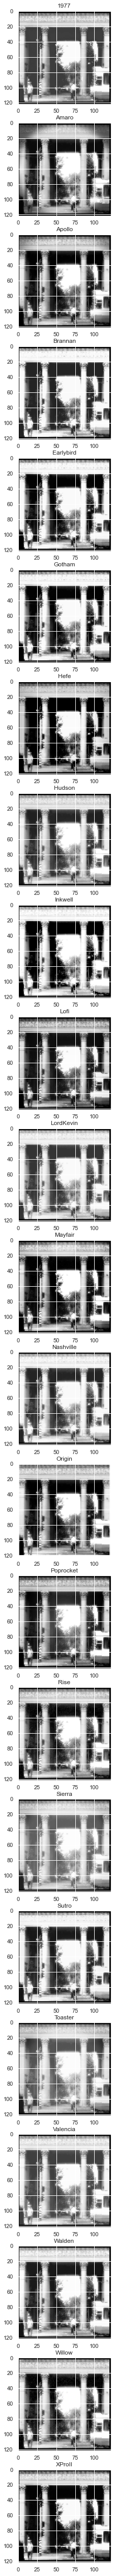

In [3]:
import plot
plot.show_images(plot_figure, cols=23, titles=plot_title)

## Datensätze vereinen und Model bilden

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=40, random_state=random_state, max_features="sqrt", verbose=1, n_jobs=-1)
classifier.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.0s finished


RandomForestClassifier(max_features='sqrt', n_estimators=40, n_jobs=-1,
                       random_state=42, verbose=1)

## Crossvalidation

In [5]:
cv = RepeatedStratifiedKFold(n_splits=3, random_state=42)
n_scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
y_pred = classifier.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

Accuracy: 0.357 (0.004)
              precision    recall  f1-score   support

        1977       0.80      0.68      0.74       265
       Amaro       0.60      0.52      0.56       286
      Apollo       0.07      0.08      0.07       202
     Brannan       0.54      0.40      0.46       339
   Earlybird       0.02      0.01      0.02       270
      Gotham       0.02      0.02      0.02       262
        Hefe       0.19      0.18      0.19       288
      Hudson       0.15      0.16      0.16       245
     Inkwell       0.18      0.35      0.24       137
        Lofi       0.45      0.40      0.43       322
   LordKevin       0.41      0.34      0.37       327
     Mayfair       0.29      0.38      0.33       211
   Nashville       0.16      0.11      0.13       341
      Origin       0.95      0.97      0.96       233
   Poprocket       0.48      0.52      0.50       235
        Rise       0.03      0.04      0.03       169
      Sierra       0.83      0.58      0.68       331
   

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished


## Ausgabe des Confusion Matrix

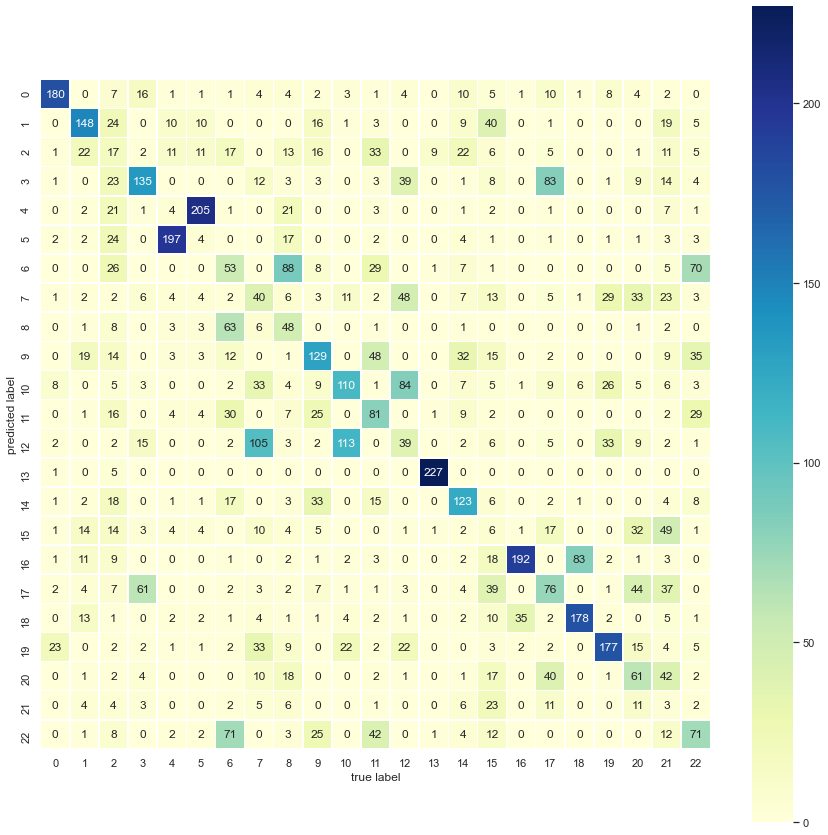

In [6]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');